# COMP5318 - Machine Learning and Data Mining: Assignment 2
**Deadline**: The last day of Week 6, at 11:59PM

Full Name: Jingyun He

Student ID: 530416562

# 1. Summary

For this assignment, we will apply different sentiment analysis models on movie reviews gathered from the Internet Movie Database (IMDb) and find the best model with optimal parameters. Sentiment analysis is a natural language processing (NLP) technique for analysing a text string to determine the sentiment contained within it. For example, you can use sentiment analysis to predict whether a movie review has positive feedback ("I liked this movie") or negative feedback ("The film was a disappointment").

The learning goals of this assignment are:
- Understand and implement different supervised and unsupervised methods for sentiment analysis.
- Understand important steps of data preparation for deep learning NLP.
- Understand NLP evaluation methods

### Important Notes
1)	Please refer to lecture notes, lab materials, and resources of Week 4 and Week 5 for different sentiment analysis methods and evaluation methods. 
2)	Please proceed your own way if we do not specify it in the assignment details.
3)	You can use packages or code from the tutorial. If you use any other package or code, please put the reference at the bottom of the code. Otherwise, it will be considered as plagiarism and the relevant section will not be marked


# 2. Dataset description

The IMDB large movie review dataset is a common dataset for NLP tasks. The dataset consists of 50,000 reviews -- 25,000 for training and 25,000 for testing. The training and test files are evenly divided into 12,500 positive reviews and 12,500 negative reviews, labeled by sentiment (positive/negative). In this assignment, you will be provided an ***input*** folder including a training data file and a testing data file in the *csv* format.

Here are some illustrating samples of the dataset:

<img src="imdb_samples.png" alt="DataSet" title="DataSet" width="450" height="300" />

# 3. How to load the data and make output prediciton
The provided *input* folder including only 2 files (Please find the starter code in the assignment page on the course website):

    1. train.csv (25,000 reviews for training including text and sentiment label) 
    2. test.csv (25,000 reviews for prediction)

## 3.1 How to load the data

You can load the *"csv"* data files into dataframes using Pandas library. All the data files are located at the ./input/ folder. 

List all files available in the *input* folder.

In [1]:
import pandas as pd
import os
print(os.listdir("A2"))
pd.set_option('display.max_columns', 10)

['test.csv', 'train .csv']


Load training data

In [2]:
# train.csv including text and sentiment label using for training model.
data_train_df = pd.read_csv('A2/train .csv')
data_train_df.shape

(25000, 2)

The training data would be a dataframe with 25,000 samples including review text and its sentiment label.

Let print the first 10 training samples.

In [3]:
data_train_df.head(10)

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg
5,"The original movie, The Odd Couple, has some w...",pos
6,"This was a great movie with a good cast, all o...",pos
7,"I'm a sucker for a good romance, but this one ...",neg
8,"Fast-paced, funny, sexy, and spectacular. Cagn...",pos
9,"The proverb ""Never judge a book by it's cover""...",neg


The "review" column contains the textual information (input features) and the "sentiment" column contains the output labels. The task of any models is to correctly predict the "sentiment" given any "review" or textual column.

Summary of the training dataset

In [4]:
data_train_df.describe()

,text,sentiment
count,25000,25000
unique,24904,2
top,How has this piece of crap stayed on TV this l...,neg
freq,3,12500


Sentiment count

In [5]:
data_train_df['sentiment'].value_counts()

neg    12500
pos    12500
Name: sentiment, dtype: int64

## 3.2 Load test data

You are required to load the test data by yourself. 

In [6]:
data_test_df = pd.read_csv('A2/test.csv')
data_test_df.shape


(25000, 2)

# 4. Assignment Details
Your task is to determine / build a classifier for the given data set to classify images into categories and write a report. The score allocation is as follows:
    

### Submission Method

You need to submit a report (pdf file) and a code file (ipynb file). 
1.	**Code**: ipynb file that can be successfully run on Colab and contain all sections of the given template. The file name should be your SID. For example: '123123123.ipynb'. Students auditing the class (not registered) are NOT allowed to upload a submission.
**IMPORTANT**: Run all cells, and do not clear out the outputs, before submitting. You will only get credit for code that has been run. 

2. **Report**: pdf file with a maximum of 5 pages (appendix and reference excluded). The file name should be your SID. For example: '123123123.pdf'


## 4.1 Code (80 points)
Your code must clearly show :

    1. Data Pre-processing
    2. The implementation details for each method
    3. The process of fine-tuning hyper-parameters for each algorithm
    4. The performance of each method and evaluation of each model
    5. The comparison of models performance
    6. Hardware and software specifications of the computer that you used for implementation

Your program needs to be easily readable and well commented. 
The following are expected to be satisfied:
- **Readability & Consistency**: Easy to read, and consistent in style
- **Coding Descriptions & Comments**: Descriptions and comments clarify meaning where needed
- **Robustness**: Handles erroneous or unexpected input 


### 4.1.0 Setup

Import and install all the necessaries libraries

In [9]:
#Import important libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


### 4.1.1 Data Preprocessing

The purpose of data preprocessing is to eliminate the redundancies (e.g., punctuations, stopwords, etc.) and to bring text components in the dataset to some standard numerical format. This is one of the key steps before going into the process of building sentiment analysis models. You are required to apply preprocessing techique before you can apply the classification algorithms. 

*Hint*: Preprocessing techiques for text data can be used such as *Data cleaning*, *Tokenization*, *Lemmatization*, *Normalization*, *PCA*, etc.

In [10]:
#Define preprocessing function
def preprocess_text(text):
   # Remove non-alphabet characters
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Convert to lowercase and tokenize
    words = text.lower().split()

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words = [w for w in words if w not in stop_words]

    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]

    # Join the processed words back into a string
    return " ".join(words)

#Preprocess the text in the training and test data
data_train_df["clean_text"] = data_train_df["text"].apply(preprocess_text)
data_test_df["clean_text"] = data_test_df["text"].apply(preprocess_text)

#Convert the preprocessed text into TF-IDF feature vectors
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(data_train_df["clean_text"])
X_test = vectorizer.transform(data_test_df["clean_text"])

#Use PCA to perform dimensionality reduction on the feature vectors
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

#Get the sentiment labels for the training and test data
y_train = data_train_df["sentiment"]
y_test = data_test_df["sentiment"]



### 4.1.2 Sentiment Analysis Model

You are required to build **at least three (3) sentiment analysis models** on the pre-processed dataset including **two (2) supervised algorithm** amongst the following list:

    1. Convolutional Neural Network
    2. Recurrent Neural Network or its variant such as Long-Short Term Memory, Gate Recurrent Unit, etc.
    3. Transformer

and **one (1) unsupervised algorithm** amongst the following list:

    1. K-Means Clustering
    2. Gaussian Mixture Models
    3. Agglomerative Hierarchical Clustering

*Hint*: Models can be built using popular ML/DL libraries such as *Sklearn*, *Pytorch*, *Keras*, *Tensorflow*, etc.

#### 4.1.2.1 Model 1

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

#Set maximum sequence length and vocabulary size
max_length = 100
vocab_size = 10000

#Initialize tokenizer and fit it to the training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(data_train_df["clean_text"])

#Convert the text in the training and test data into sequences of integers
sequences_train = tokenizer.texts_to_sequences(data_train_df["clean_text"])
sequences_test = tokenizer.texts_to_sequences(data_test_df["clean_text"])

#Pad the sequences to have the same length
padded_train = pad_sequences(sequences_train, maxlen=max_length, padding='post', truncating='post')
padded_test = pad_sequences(sequences_test, maxlen=max_length, padding='post', truncating='post')

#Encode the sentiment labels using LabelEncoder
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

#Define the CNN model architecture
model_cnn = Sequential([
Embedding(vocab_size, 64, input_length=max_length),
Conv1D(64, 5, activation='relu'),
GlobalMaxPooling1D(),
Dense(64, activation='relu'),
Dense(len(np.unique(y_train_encoded)), activation='softmax')
])

#Compile the model and fit it to the training data
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.fit(padded_train, y_train_encoded, epochs=10, validation_data=(padded_test, y_test_encoded))

Epoch 1/10
782/782 [==============================] - 11s 6ms/step - loss: 0.4285 - accuracy: 0.7919 - val_loss: 0.3516 - val_accuracy: 0.8451
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 0.1864 - accuracy: 0.9311 - val_loss: 0.3979 - val_accuracy: 0.8305
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0383 - accuracy: 0.9904 - val_loss: 0.5232 - val_accuracy: 0.8374
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0049 - accuracy: 0.9996 - val_loss: 0.6379 - val_accuracy: 0.8405
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 4.9136e-04 - accuracy: 1.0000 - val_loss: 0.6949 - val_accuracy: 0.8397
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 1.6786e-04 - accuracy: 1.0000 - val_loss: 0.7324 - val_accuracy: 0.8403
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 9.4270e-05 - accuracy: 1.0000 - val_loss: 0.7663 - val_accuracy: 

#### 4.1.2.2 Model 2

In [14]:
#Define the LSTM model architecture
model_lstm = Sequential([
Embedding(vocab_size, 64, input_length=max_length),
LSTM(64, return_sequences=True),
LSTM(64),
Dense(64, activation='relu'),
Dense(len(np.unique(y_train_encoded)), activation='softmax')
])

#Compile the model and fit it to the training data
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(padded_train, y_train_encoded, epochs=10, validation_data=(padded_test, y_test_encoded))


Epoch 1/10
782/782 [==============================] - 21s 23ms/step - loss: 0.6816 - accuracy: 0.5310 - val_loss: 0.6856 - val_accuracy: 0.5146
Epoch 2/10
782/782 [==============================] - 18s 22ms/step - loss: 0.6847 - accuracy: 0.5122 - val_loss: 0.6851 - val_accuracy: 0.5150
Epoch 3/10
782/782 [==============================] - 17s 22ms/step - loss: 0.6833 - accuracy: 0.5322 - val_loss: 0.5744 - val_accuracy: 0.7153
Epoch 4/10
782/782 [==============================] - 16s 21ms/step - loss: 0.3867 - accuracy: 0.8343 - val_loss: 0.3853 - val_accuracy: 0.8326
Epoch 5/10
782/782 [==============================] - 16s 21ms/step - loss: 0.2374 - accuracy: 0.9082 - val_loss: 0.3901 - val_accuracy: 0.8360
Epoch 6/10
782/782 [==============================] - 16s 21ms/step - loss: 0.1651 - accuracy: 0.9423 - val_loss: 0.4606 - val_accuracy: 0.8240
Epoch 7/10
782/782 [==============================] - 16s 21ms/step - loss: 0.1087 - accuracy: 0.9644 - val_loss: 0.5923 - val_accuracy:

#### 4.1.2.3 Model 3

In [15]:
# Use the PCA-transformed features from the previous preprocessing step
kmeans = KMeans(n_clusters=len(np.unique(y_train_encoded)), random_state=42)
kmeans.fit(X_train_pca)

# Predict and evaluate the K-Means clustering model
y_train_pred = kmeans.predict(X_train_pca)
y_test_pred = kmeans.predict(X_test_pca)

print("Train confusion matrix:")
print(confusion_matrix(y_train_encoded, y_train_pred))
print("Train classification report:")
print(classification_report(y_train_encoded, y_train_pred))

print("Test confusion matrix:")
print(confusion_matrix(y_test_encoded, y_test_pred))
print("Test classification report:")
print(classification_report(y_test_encoded, y_test_pred))


d:\anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Train confusion matrix:
[[4938 7562]
 [4355 8145]]
Train classification report:
              precision    recall  f1-score   support

           0       0.53      0.40      0.45     12500
           1       0.52      0.65      0.58     12500

    accuracy                           0.52     25000
   macro avg       0.52      0.52      0.52     25000
weighted avg       0.52      0.52      0.52     25000

Test confusion matrix:
[[4884 7616]
 [4369 8131]]
Test classification report:
              precision    recall  f1-score   support

           0       0.53      0.39      0.45     12500
           1       0.52      0.65      0.58     12500

    accuracy                           0.52     25000
   macro avg       0.52      0.52      0.51     25000
weighted avg       0.52      0.52      0.51     25000



### 4.1.3 Parameter Fine-Tuning

For each method you are required to find the best set of parameters.

*Hint*: You can use fine-tuning methods like *Cross-Validation*, *“Elbow” Method*, *"Silhouette" Method*, etc.

In [16]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

#Define a function to create the CNN model
def create_cnn_model(filter_size=64, kernel_size=5, dense_units=64):
    model = Sequential([
    Embedding(vocab_size, 64, input_length=max_length),
    Conv1D(filter_size, kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(dense_units, activation='relu'),
    Dense(len(np.unique(y_train_encoded)), activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#Create a KerasClassifier object based on the CNN model and set its parameters
cnn_model = KerasClassifier(build_fn=create_cnn_model, epochs=10, verbose=0)

#Define the grid of hyperparameters to search over
param_grid_cnn = {
'filter_size': [32, 64],
'kernel_size': [3, 5],
'dense_units': [32, 64]
}

# Use GridSearchCV to search over the hyperparameter grid and find the best model
grid_cnn = GridSearchCV(estimator=cnn_model, param_grid=param_grid_cnn, cv=3)
grid_result_cnn = grid_cnn.fit(padded_train, y_train_encoded)

In [17]:
#model2
def create_lstm_model(lstm_units=64, dense_units=64):
    model = Sequential([
        Embedding(vocab_size, 64, input_length=max_length),
        LSTM(lstm_units, return_sequences=True),
        LSTM(lstm_units),
        Dense(dense_units, activation='relu'),
        Dense(len(np.unique(y_train_encoded)), activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [18]:
lstm_model = KerasClassifier(build_fn=create_lstm_model, epochs=10, verbose=0)
param_grid_lstm = {
    'lstm_units': [32, 64],
    'dense_units': [32, 64]
}
grid_lstm = GridSearchCV(estimator=lstm_model, param_grid=param_grid_lstm, cv=3)
grid_result_lstm = grid_lstm.fit(padded_train, y_train_encoded)


In [19]:
#model3
from sklearn.metrics import silhouette_score

distortions = []
silhouettes = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    distortions.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_train_pca, kmeans.labels_))


d:\anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_k

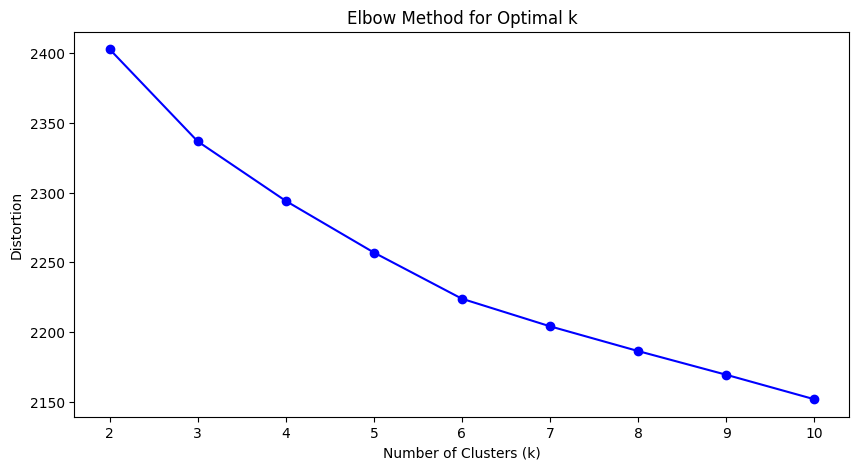

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()


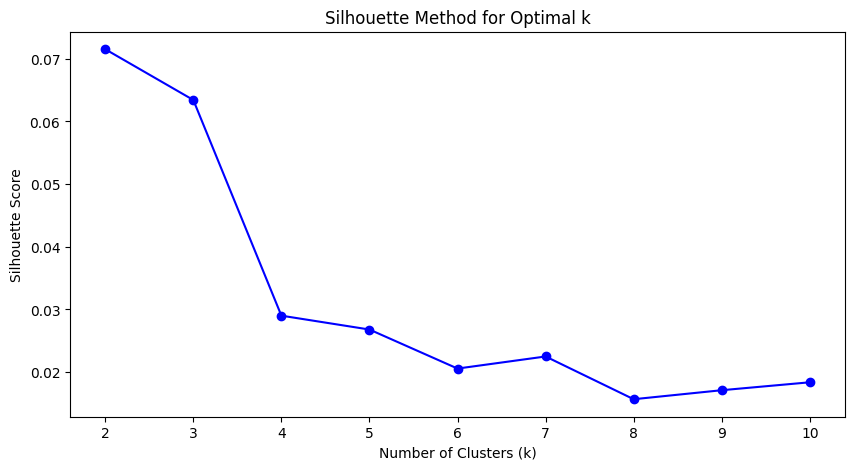

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()


In [22]:
optimal_k = 8 # According to the visualizations, assign 8 to the optimal_k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X_train_pca)

d:\anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

### 4.1.4. Evaluation

You are required to evaluate models' performance by using **at least two different evaluation metrics for each model** and **visualise using graphs or tables.**

*Hint*: Evaluation metrics can be used such as *Accuracy*, *Precision*, *Recall*, etc.  

### 4.1.4 Comparison

After fine-tuning parameters for each model, we would like to make comparisons using graphs or tables between all models using their own best hyper-parameters to select the best model.

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#Predict the classes using the best models obtained from GridSearchCV
y_pred_cnn = grid_result_cnn.predict(padded_test)
y_pred_lstm = grid_result_lstm.predict(padded_test)

#Calculate the metrics for CNN model
accuracy_cnn = accuracy_score(y_test_encoded, y_pred_cnn)
precision_cnn = precision_score(y_test_encoded, y_pred_cnn, average='weighted')
recall_cnn = recall_score(y_test_encoded, y_pred_cnn, average='weighted')
f1_cnn = f1_score(y_test_encoded, y_pred_cnn, average='weighted')

#Calculate the metrics for LSTM model
accuracy_lstm = accuracy_score(y_test_encoded, y_pred_lstm)
precision_lstm = precision_score(y_test_encoded, y_pred_lstm, average='weighted')
recall_lstm = recall_score(y_test_encoded, y_pred_lstm, average='weighted')
f1_lstm = f1_score(y_test_encoded, y_pred_lstm, average='weighted')

#Calculate the metrics for KMeans clustering model
accuracy_kmeans = accuracy_score(y_test_encoded, y_test_pred)
precision_kmeans = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_kmeans = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_kmeans = f1_score(y_test_encoded, y_test_pred, average='weighted')

In [24]:
metrics_df = pd.DataFrame(
    {
        'Model': ['CNN', 'LSTM', 'K-Means'],
        'Accuracy': [accuracy_cnn, accuracy_lstm, accuracy_kmeans],
        'Precision': [precision_cnn, precision_lstm, precision_kmeans],
        'Recall': [recall_cnn, recall_lstm, recall_kmeans],
        'F1-score': [f1_cnn, f1_lstm, f1_kmeans]
    }
)

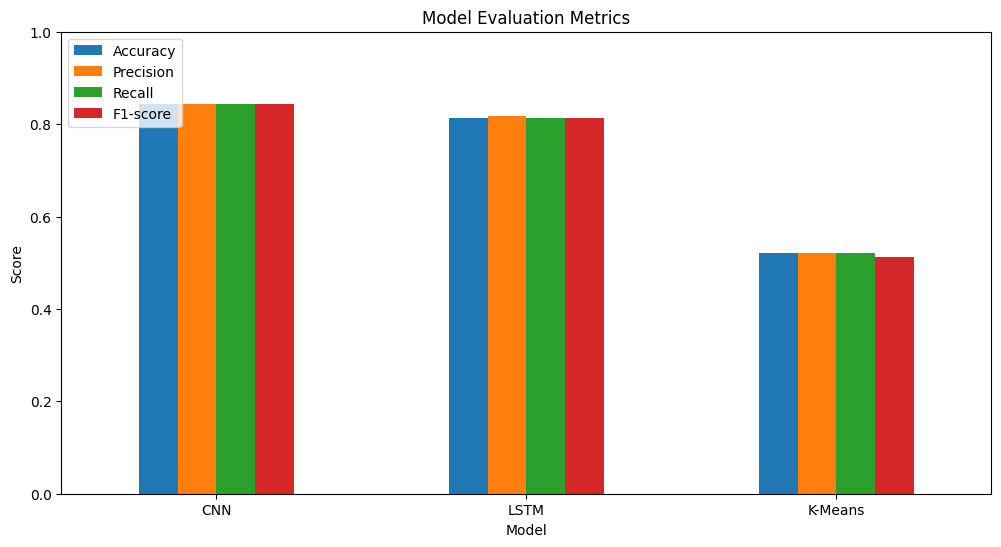

         Accuracy  Precision  Recall  F1-score
Model                                         
CNN          0.84       0.84    0.84      0.84
LSTM         0.81       0.82    0.81      0.81
K-Means      0.52       0.52    0.52      0.51


In [25]:
metrics_df.set_index('Model', inplace=True)
ax = metrics_df.plot.bar(rot=0, figsize=(12, 6))
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.legend(loc='upper left')
plt.show()
print(metrics_df.round(2))

### 4.1.5 Software & Hardware Specification

Python 3.7 or later
Libraries: numpy, pandas, tensorflow, kera, scikit-learn, seaborn, matplotlib
windows 10，Intel(R) Core(TM) i7-9700 CPU @ 3.00GHz   3.00 GHz

## 4.2 Report (20 points)

### The report must clearly show:
    1. Detail of student including ID, name
    2. Details of data preprocessing technieques
    3. Details of sentiment analysis methodology
    4. Details of model performance, evaluation & comparison
    5. Conclusion
    6. Clearly provide instructions on how to run your code, hardware and software environments in the Appendix section

**Important Note**: The maximum length of the report is 10 (excluding appendix and references). Please find the report template for your reference.